In [11]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import join, setdiff

# My progs
from myprogs.vlbi.sou_func import read_sou, read_crf
from myprogs.catalog.read_icrf import read_icrf3
from myprogs.catalog.pos_diff import radio_cat_diff_calc
from myprogs.vsh.vsh_fit import vsh_fit_4_table

In [2]:
icrf3sx = read_icrf3(wv="sx")

icrf3def = icrf3sx[icrf3sx["type"] == "D"]

In [3]:
glo_sou = read_sou("../data/nju2021a.sou", drop_few_obs=True, nobs_lim=1)

There are 5800 sources in the original catalog, 520 (9%) sources with #obs < 1 dropped, leaving 5280 sources in the present catalog.


In [4]:
glo_sou

ivs_name,j2000_name,iers_name,class,ra,ra_err,dec,dec_err,ra_dec_corr,pos_err,num_obs,total_obs,num_ses,total_ses,beg_epoch,end_epoch,mean_epoch
,,,,deg,mas,deg,mas,,mas,,,,,MJD,MJD,MJD
str8,str10,str8,str1,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64
0000+019,--,0000+019,--,0.8123452133333334,0.16337402571637524,2.2493010663055557,0.3974,-0.529,0.40788687931610446,184,219,2,2,58510.0,58669.0,58589.5
0000+212,J0003+2129,0000+212,C,0.8306250053333334,0.058897174293696515,21.495696785611113,0.1141,-0.112,0.11435805758719834,305,461,4,4,50084.0,58300.0,54192.0
0000-006,--,0000-006,--,0.7382305098333334,0.164195731514276,-0.4131320721388889,0.4018,-0.408,0.40820430280259723,163,219,2,2,58510.0,58669.0,58589.5
0000-160,J0003-1547,0000-160,-,0.8636006874583333,0.10027061397695904,-15.784848763583334,0.2475,-0.312,0.24980298597436873,291,433,5,5,54817.0,58794.0,56805.5
0000-197,J0003-1927,0000-197,C,0.8278126071666667,0.11776775263116937,-19.45620990322222,0.2572,0.004,0.2572005458254555,345,430,6,6,50631.0,58794.0,54712.5
0000-199,J0003-1941,0000-199,N,0.8164558731250001,0.08548694967948536,-19.697333837833334,0.196,-0.24,0.1973003380105233,298,379,5,5,54087.0,58794.0,56440.5
0001+459,J0004+4615,0001+459,C,1.0671985310833334,0.04729518800465949,46.254991908305556,0.0655,-0.025,0.06552226169407994,464,477,5,5,50305.0,58669.0,54487.0
0001+478,J0003+4807,0001+478,N,0.9418398435416666,0.1724413611591258,48.11781543116667,0.2306,-0.097,0.2319369821408139,289,416,5,5,50305.0,58644.0,54474.5


In [5]:
pos_oft_def = radio_cat_diff_calc(glo_sou, icrf3def, sou_name="iers_name")
pos_oft = radio_cat_diff_calc(glo_sou, icrf3sx, sou_name="iers_name")

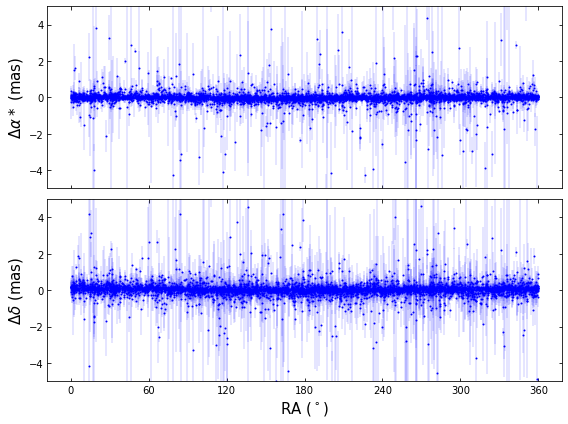

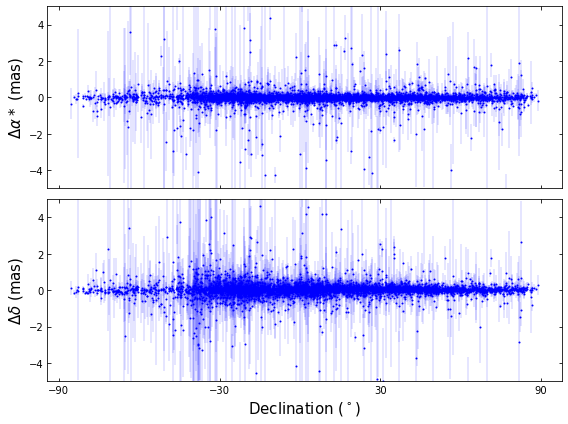

In [6]:
# Difference in RA and decl.
year = 2004
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True, sharey=True)

ax0.errorbar(pos_oft['ra'], pos_oft['dra'], yerr=pos_oft['dra_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)
ax1.errorbar(pos_oft['ra'], pos_oft['ddec'], yerr=pos_oft['ddec_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.set_xticks(np.arange(0, 361, 60))

xmax = 5
ax0.set_ylim([-xmax, xmax])

ax1.set_xlabel('RA ($^\circ$)', fontsize=15)
ax0.set_ylabel('$\Delta\\alpha*$ (mas)', fontsize=15)
ax1.set_ylabel('$\Delta\\delta$ (mas)', fontsize=15)

# ax0.set_title("{:d}-c $-$ ICRF3 S/X".format(year+1), fontsize=15)
fig.tight_layout()

# Difference in RA and decl.
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True, sharey=True)

ax0.errorbar(pos_oft['dec'], pos_oft['dra'], yerr=pos_oft['dra_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)
ax1.errorbar(pos_oft['dec'], pos_oft['ddec'], yerr=pos_oft['ddec_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.set_xticks(np.arange(-90, 91, 60))
ax0.set_ylim([-xmax, xmax])

ax1.set_xlabel('Declination ($^\circ$)', fontsize=15)
ax0.set_ylabel('$\Delta\\alpha*$ (mas)', fontsize=15)
ax1.set_ylabel('$\Delta\\delta$ (mas)', fontsize=15)

# ax0.set_title("{:d}-c $-$ ICRF3 S/X".format(year+1), fontsize=15)
fig.tight_layout()

In [10]:
vsh_fit_4_table(pos_oft)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                      4525
    Maximum degree of VSH                     1
    Number of unknowns to determine           6
    Number of degree of freedom            9043

No constraint is put on the data, so the fitting will be done only once.

Convert t_lm/s_lm at l=1 into rotation/glide vector
--------------------------------------------------------------------
           Glide [dex]                 Rotation [dex]   
  G1         G2        G3         R1         R2        R3       
--------------------------------------------------------------------
  +0    0    +0    0   +0    0    +0    0   -0    0    -0    0  
--------------------------------------------------------------------


{'note': 'pmt: fitted VSH parameters\nsig: formal uncertainties\ncor: correlation coefficient matirx\nresidual: post-fit residual of (dra, ddec)\npmt1: glide+rotation\nsig1: formal error of glide/rotation\ncor1: correlation coeficient matrix of glide/rotation\nR/G: amplitude of rotation/Glide\nR_ra, R_dec: apex of rotation vector\nG_ra, G_dec: apex of glide vector\n',
 'pmt': array([-0.01554978,  0.19692779, -0.04757021, -0.0340586 , -0.09455751,
         0.07680808]),
 'sig_lsq': array([0.00444072, 0.0055559 , 0.00403322, 0.00361137, 0.00399483,
        0.00352585]),
 'cor': array([[ 1.00000000e+00, -5.19250164e-02,  3.82184684e-02,
         -4.56027461e-02, -9.26566057e-03,  2.21819817e-05],
        [-5.19250164e-02,  1.00000000e+00,  3.77023519e-02,
          2.74269040e-02, -2.00714657e-03, -2.25912605e-02],
        [ 3.82184684e-02,  3.77023519e-02,  1.00000000e+00,
          2.61808553e-02, -1.62143379e-02, -3.19695053e-01],
        [-4.56027461e-02,  2.74269040e-02,  2.61808553e

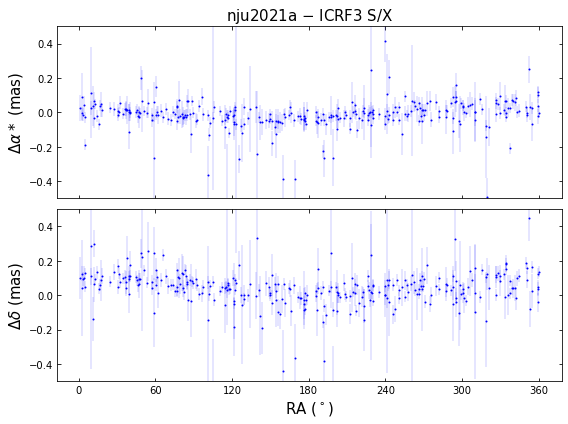

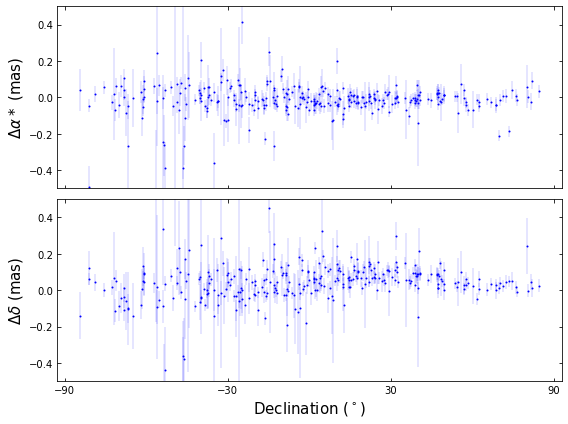

In [7]:
# Difference in RA and decl.
year = 2004
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True, sharey=True)

ax0.errorbar(pos_oft_def['ra'], pos_oft_def['dra'], yerr=pos_oft_def['dra_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)
ax1.errorbar(pos_oft_def['ra'], pos_oft_def['ddec'], yerr=pos_oft_def['ddec_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.set_xticks(np.arange(0, 361, 60))

xmax = 0.5
ax0.set_ylim([-xmax, xmax])

ax1.set_xlabel('RA ($^\circ$)', fontsize=15)
ax0.set_ylabel('$\Delta\\alpha*$ (mas)', fontsize=15)
ax1.set_ylabel('$\Delta\\delta$ (mas)', fontsize=15)
ax0.set_title("nju2021a $-$ ICRF3 S/X", fontsize=15)

fig.tight_layout()

# Difference in RA and decl.
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True, sharey=True)

ax0.errorbar(pos_oft_def['dec'], pos_oft_def['dra'], yerr=pos_oft_def['dra_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)
ax1.errorbar(pos_oft_def['dec'], pos_oft_def['ddec'], yerr=pos_oft_def['ddec_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.set_xticks(np.arange(-90, 91, 60))
ax0.set_ylim([-xmax, xmax])

ax1.set_xlabel('Declination ($^\circ$)', fontsize=15)
ax0.set_ylabel('$\Delta\\alpha*$ (mas)', fontsize=15)
ax1.set_ylabel('$\Delta\\delta$ (mas)', fontsize=15)

fig.tight_layout()

In [9]:
vsh_fit_4_table(pos_oft_def)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                       303
    Maximum degree of VSH                     1
    Number of unknowns to determine           6
    Number of degree of freedom             599

No constraint is put on the data, so the fitting will be done only once.

Convert t_lm/s_lm at l=1 into rotation/glide vector
--------------------------------------------------------------------
           Glide [dex]                 Rotation [dex]   
  G1         G2        G3         R1         R2        R3       
--------------------------------------------------------------------
  +0    0    +0    0   +0    0    +0    0   -0    0    -0    0  
--------------------------------------------------------------------


{'note': 'pmt: fitted VSH parameters\nsig: formal uncertainties\ncor: correlation coefficient matirx\nresidual: post-fit residual of (dra, ddec)\npmt1: glide+rotation\nsig1: formal error of glide/rotation\ncor1: correlation coeficient matrix of glide/rotation\nR/G: amplitude of rotation/Glide\nR_ra, R_dec: apex of rotation vector\nG_ra, G_dec: apex of glide vector\n',
 'pmt': array([-0.02380497,  0.18902554, -0.0491513 , -0.03700889, -0.10045242,
         0.05774805]),
 'sig_lsq': array([0.0081708 , 0.00898007, 0.00641076, 0.00611928, 0.00656739,
        0.00622449]),
 'cor': array([[ 1.        , -0.03013703,  0.034354  , -0.03112365,  0.01097616,
         -0.00168214],
        [-0.03013703,  1.        ,  0.02658962,  0.00490236,  0.00285329,
         -0.0101487 ],
        [ 0.034354  ,  0.02658962,  1.        ,  0.01541234, -0.02399534,
         -0.2075147 ],
        [-0.03112365,  0.00490236,  0.01541234,  1.        ,  0.21618296,
         -0.02425306],
        [ 0.01097616,  0.00285

In [12]:
opa2021a = read_crf("/Users/Neo/Astronomy/data/vlbi/opa/opa2021/opa2021a.crf")

In [13]:
opa_oft_def = radio_cat_diff_calc(opa2021a, icrf3def, sou_name="iers_name")
opa_oft = radio_cat_diff_calc(opa2021a, icrf3sx, sou_name="iers_name")

In [14]:
vsh_fit_4_table(opa_oft)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                      4491
    Maximum degree of VSH                     1
    Number of unknowns to determine           6
    Number of degree of freedom            8975

No constraint is put on the data, so the fitting will be done only once.

Convert t_lm/s_lm at l=1 into rotation/glide vector
--------------------------------------------------------------------
           Glide [dex]                 Rotation [dex]   
  G1         G2        G3         R1         R2        R3       
--------------------------------------------------------------------
  +0    0    +0    0   +0    0    +0    0   -0    0    -0    0  
--------------------------------------------------------------------


{'note': 'pmt: fitted VSH parameters\nsig: formal uncertainties\ncor: correlation coefficient matirx\nresidual: post-fit residual of (dra, ddec)\npmt1: glide+rotation\nsig1: formal error of glide/rotation\ncor1: correlation coeficient matrix of glide/rotation\nR/G: amplitude of rotation/Glide\nR_ra, R_dec: apex of rotation vector\nG_ra, G_dec: apex of glide vector\n',
 'pmt': array([-0.01520608,  0.13656381, -0.06200014, -0.04057579, -0.08133563,
         0.09691633]),
 'sig_lsq': array([4.79146921, 6.79736077, 4.93820529, 3.90690843, 4.79623192,
        3.97840909]),
 'cor': array([[ 1.        , -0.03636817,  0.12035589, -0.02501657,  0.22719102,
         -0.00236839],
        [-0.03636817,  1.        ,  0.04824448, -0.07335286, -0.02890528,
         -0.2116704 ],
        [ 0.12035589,  0.04824448,  1.        ,  0.02305741, -0.09801972,
         -0.36067981],
        [-0.02501657, -0.07335286,  0.02305741,  1.        ,  0.36239755,
          0.06924314],
        [ 0.22719102, -0.02890

In [15]:
vsh_fit_4_table(opa_oft_def)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                       303
    Maximum degree of VSH                     1
    Number of unknowns to determine           6
    Number of degree of freedom             599

No constraint is put on the data, so the fitting will be done only once.

Convert t_lm/s_lm at l=1 into rotation/glide vector
--------------------------------------------------------------------
           Glide [dex]                 Rotation [dex]   
  G1         G2        G3         R1         R2        R3       
--------------------------------------------------------------------
  +0    0    +0    0   +0    0    +0    0   -0    0    -0    0  
--------------------------------------------------------------------


{'note': 'pmt: fitted VSH parameters\nsig: formal uncertainties\ncor: correlation coefficient matirx\nresidual: post-fit residual of (dra, ddec)\npmt1: glide+rotation\nsig1: formal error of glide/rotation\ncor1: correlation coeficient matrix of glide/rotation\nR/G: amplitude of rotation/Glide\nR_ra, R_dec: apex of rotation vector\nG_ra, G_dec: apex of glide vector\n',
 'pmt': array([-0.02851412,  0.15719312, -0.07291027, -0.0414265 , -0.10736248,
         0.06762396]),
 'sig_lsq': array([ 7.3151254 , 10.07454749,  7.15516406,  5.48992295,  7.12808682,
         6.03623603]),
 'cor': array([[ 1.        , -0.01591943,  0.1157759 ,  0.0069823 ,  0.30931649,
          0.00769326],
        [-0.01591943,  1.        ,  0.04994631, -0.12752048, -0.01917855,
         -0.22559347],
        [ 0.1157759 ,  0.04994631,  1.        ,  0.02364945, -0.12201211,
         -0.28702101],
        [ 0.0069823 , -0.12752048,  0.02364945,  1.        ,  0.29039172,
          0.09181554],
        [ 0.30931649, -0